In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
df = pd.read_csv('.../Data/train.csv',delimiter=',',encoding='latin-1')
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [3]:
df.author.unique()

array(['EAP', 'HPL', 'MWS'], dtype=object)

In [4]:
df.author.unique().size

3

In [5]:
X = df.text
Y = df.author
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)

In [7]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [8]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(4,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [9]:
model = RNN()
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 4)                 1028  

In [10]:
history = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2)

Epoch 1/10
82/82 [==============================] - 11s 112ms/step - loss: 1.2022 - accuracy: 0.3875 - val_loss: 1.0390 - val_accuracy: 0.4600
Epoch 2/10
82/82 [==============================] - 9s 105ms/step - loss: 0.9211 - accuracy: 0.5667 - val_loss: 0.7335 - val_accuracy: 0.6772
Epoch 3/10
82/82 [==============================] - 9s 106ms/step - loss: 0.6048 - accuracy: 0.7609 - val_loss: 0.6890 - val_accuracy: 0.7191
Epoch 4/10
82/82 [==============================] - 8s 102ms/step - loss: 0.5327 - accuracy: 0.7854 - val_loss: 0.6857 - val_accuracy: 0.7127
Epoch 5/10
82/82 [==============================] - 8s 98ms/step - loss: 0.5155 - accuracy: 0.7954 - val_loss: 0.6636 - val_accuracy: 0.7195
Epoch 6/10
82/82 [==============================] - 8s 101ms/step - loss: 0.4955 - accuracy: 0.8049 - val_loss: 0.6973 - val_accuracy: 0.7168
Epoch 7/10
82/82 [==============================] - 9s 110ms/step - loss: 0.4731 - accuracy: 0.8136 - val_loss: 0.6738 - val_accuracy: 0.7233
Epoch 

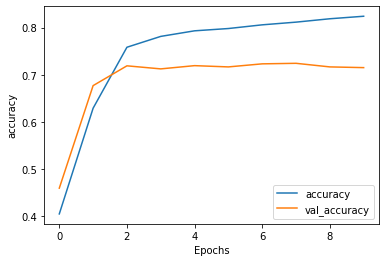

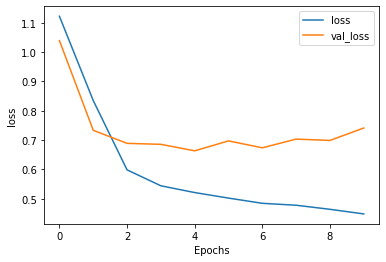

In [11]:
def graph_plots(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
graph_plots(history, "accuracy")
graph_plots(history, "loss")